(CellCycling_AccessingData)=
# Accessing and computing properities

Once a `FileManager` instance has been created and the wanted files have been parsed, all the experimental data can be extracted by directly invoking the generation of a `CellCycling` object by means of the `get_cellcycling` function. An exaple of a full workflows in reported in what follows:

In [27]:
from echemsuite.cellcycling.read_input import FileManager
from echemsuite.cellcycling.cycles import CellCycling

# Create a FileManager object and load/parse the example `.mpt` file
manager = FileManager()
manager.fetch_from_folder("./", extension=".mpt")

# Get the cellcycling object from the FileManager
cellcycling = manager.get_cellcycling()

print(cellcycling)

Now that the `CellCycling` object representing the cycling experiment has been obtained all the experimental data and derived quantities can be accessed using the built-in class methods.

:::{admonition} The clean option
Please notice that in the previously examined workflow all the cycle have been loaded and marked as visible. Sometimes, however, the user may want to hide some of the cycles based on the assumption that only full charge/discharge cycles with efficiencies lower than 100% have physical meaning. This can be done automatically setting to `True` the `clean` flag in the `get_cellcycling` function. This will set the non-physical cycles to the hidden state.
::: 

## Hiding/Unhiding cycles

Each cycle in the `CellCycling` object can be at any time set/unset to/from the hidden state using the `hide`/`unhide` functions. When a cycle is set to hidden it will be automatically ignored from all the analysis. Both the `hide`/`unhide` functions takes as arguments a list of integers containing the index of the target cycles. An example snippet of code is available in what follows:

In [28]:
# Hide the second cycle
print("Hiding cycle 1")
cellcycling.hide([1])

# Print a list containing the hidden state of each cycle
for _cycle in cellcycling._cycles:
    status = "Hidden" if _cycle._hidden else "Visible"
    print(f"Cycle number {_cycle.number} is currently {status}")

# Unhide the second cycle
print("\nUnhiding cycle 1")
cellcycling.unhide([1])

# Print a list containing the hidden state of each cycle
for _cycle in cellcycling._cycles:
    status = "Hidden" if _cycle._hidden else "Visible"
    print(f"Cycle number {_cycle.number} is currently {status}")

Hiding cycle 1
Cycle number 0 is currently Visible
Cycle number 1 is currently Hidden

Unhiding cycle 1
Cycle number 0 is currently Visible
Cycle number 1 is currently Visible


## Accessing a `Cycle` and its `HalfCycles`

As the name implies, the `CellCycling` object represents a collection of charge/discharge cycles. Each cycle is defined by a `Cycle` object that can be accessed either directly by index, leaving to the user the task of verifying its hidden status, or by using the built in `CellCycling` class iterator that will return sequentially all the non-hidden cycles.

In [29]:
# Accessing the second cycle by index
print(f"Getting cycle at index 1: {cellcycling[1]}\n")

# Accessing the cycles by iterator
print("Accessing the cycles by iterator")
for cycle in cellcycling:
    print(cycle)
print("")

# Hiding the second cycle
cellcycling.hide([1])

# Accessing the second cycle by index (will print an error and return None)
print(f"Getting cycle at index 1: {cellcycling[1]}\n")

# Accessing the cycles by iterator
print("Accessing the cycles by iterator")
for cycle in cellcycling:
    print(cycle)

# Un-hiding the second cycle
cellcycling.unhide([1])

Getting cycle at index 1: <echemsuite.cellcycling.cycles.Cycle object at 0x7f125229c760>

Accessing the cycles by iterator

ERROR: cycle 1 is currently hidden.
To reinstate it, use the unhide() function
Getting cycle at index 1: None

Accessing the cycles by iterator


Once a `Cycle` object has been obtained from the `CellCycling` container the charge and discharge `HalfCycles` can be accessed directly according to the syntax:

In [30]:
first_cycle = cellcycling[0]

print(first_cycle.charge.halfcycle_type)
print(first_cycle.discharge.halfcycle_type)

charge
discharge


## The `HalfCycle` properties

The `HalfCycle` object represents the base-building block of the `cellcycling.cycles` sub-module and, as discussed in more detail in the [API reference](API-cellcycling-cycles), it holds all the experimental data of a charge/discharge process namely:

* `time` (`pandas.core.series.Series`) time steps in seconds at which the experimental data have been collected
* `voltage` (`pandas.core.series.Series`) voltage in V recorded at each time step
* `current` (`pandas.core.series.Series`) currents in A recorded at each time step
* `power` (`pandas.core.series.Series`) instantaneous power in W computed at each time step
* `energy` (`pandas.core.series.Series`) instantaneous energy in mWh computed at each time step
* `Q` (`pandas.core.series.Series`) cumulative charge in mAh computed at each time step
* `capacity` (`float`) total capacity in mAh used in the halfcyle
* `total_energy` (`float`) total energy in mWh generated/dissipated in the halfcyle

All the properties can be accessed with the provided getter function. An example in which the recorded voltage values for each halfcycle is plotted against the time, is provided in what follows:

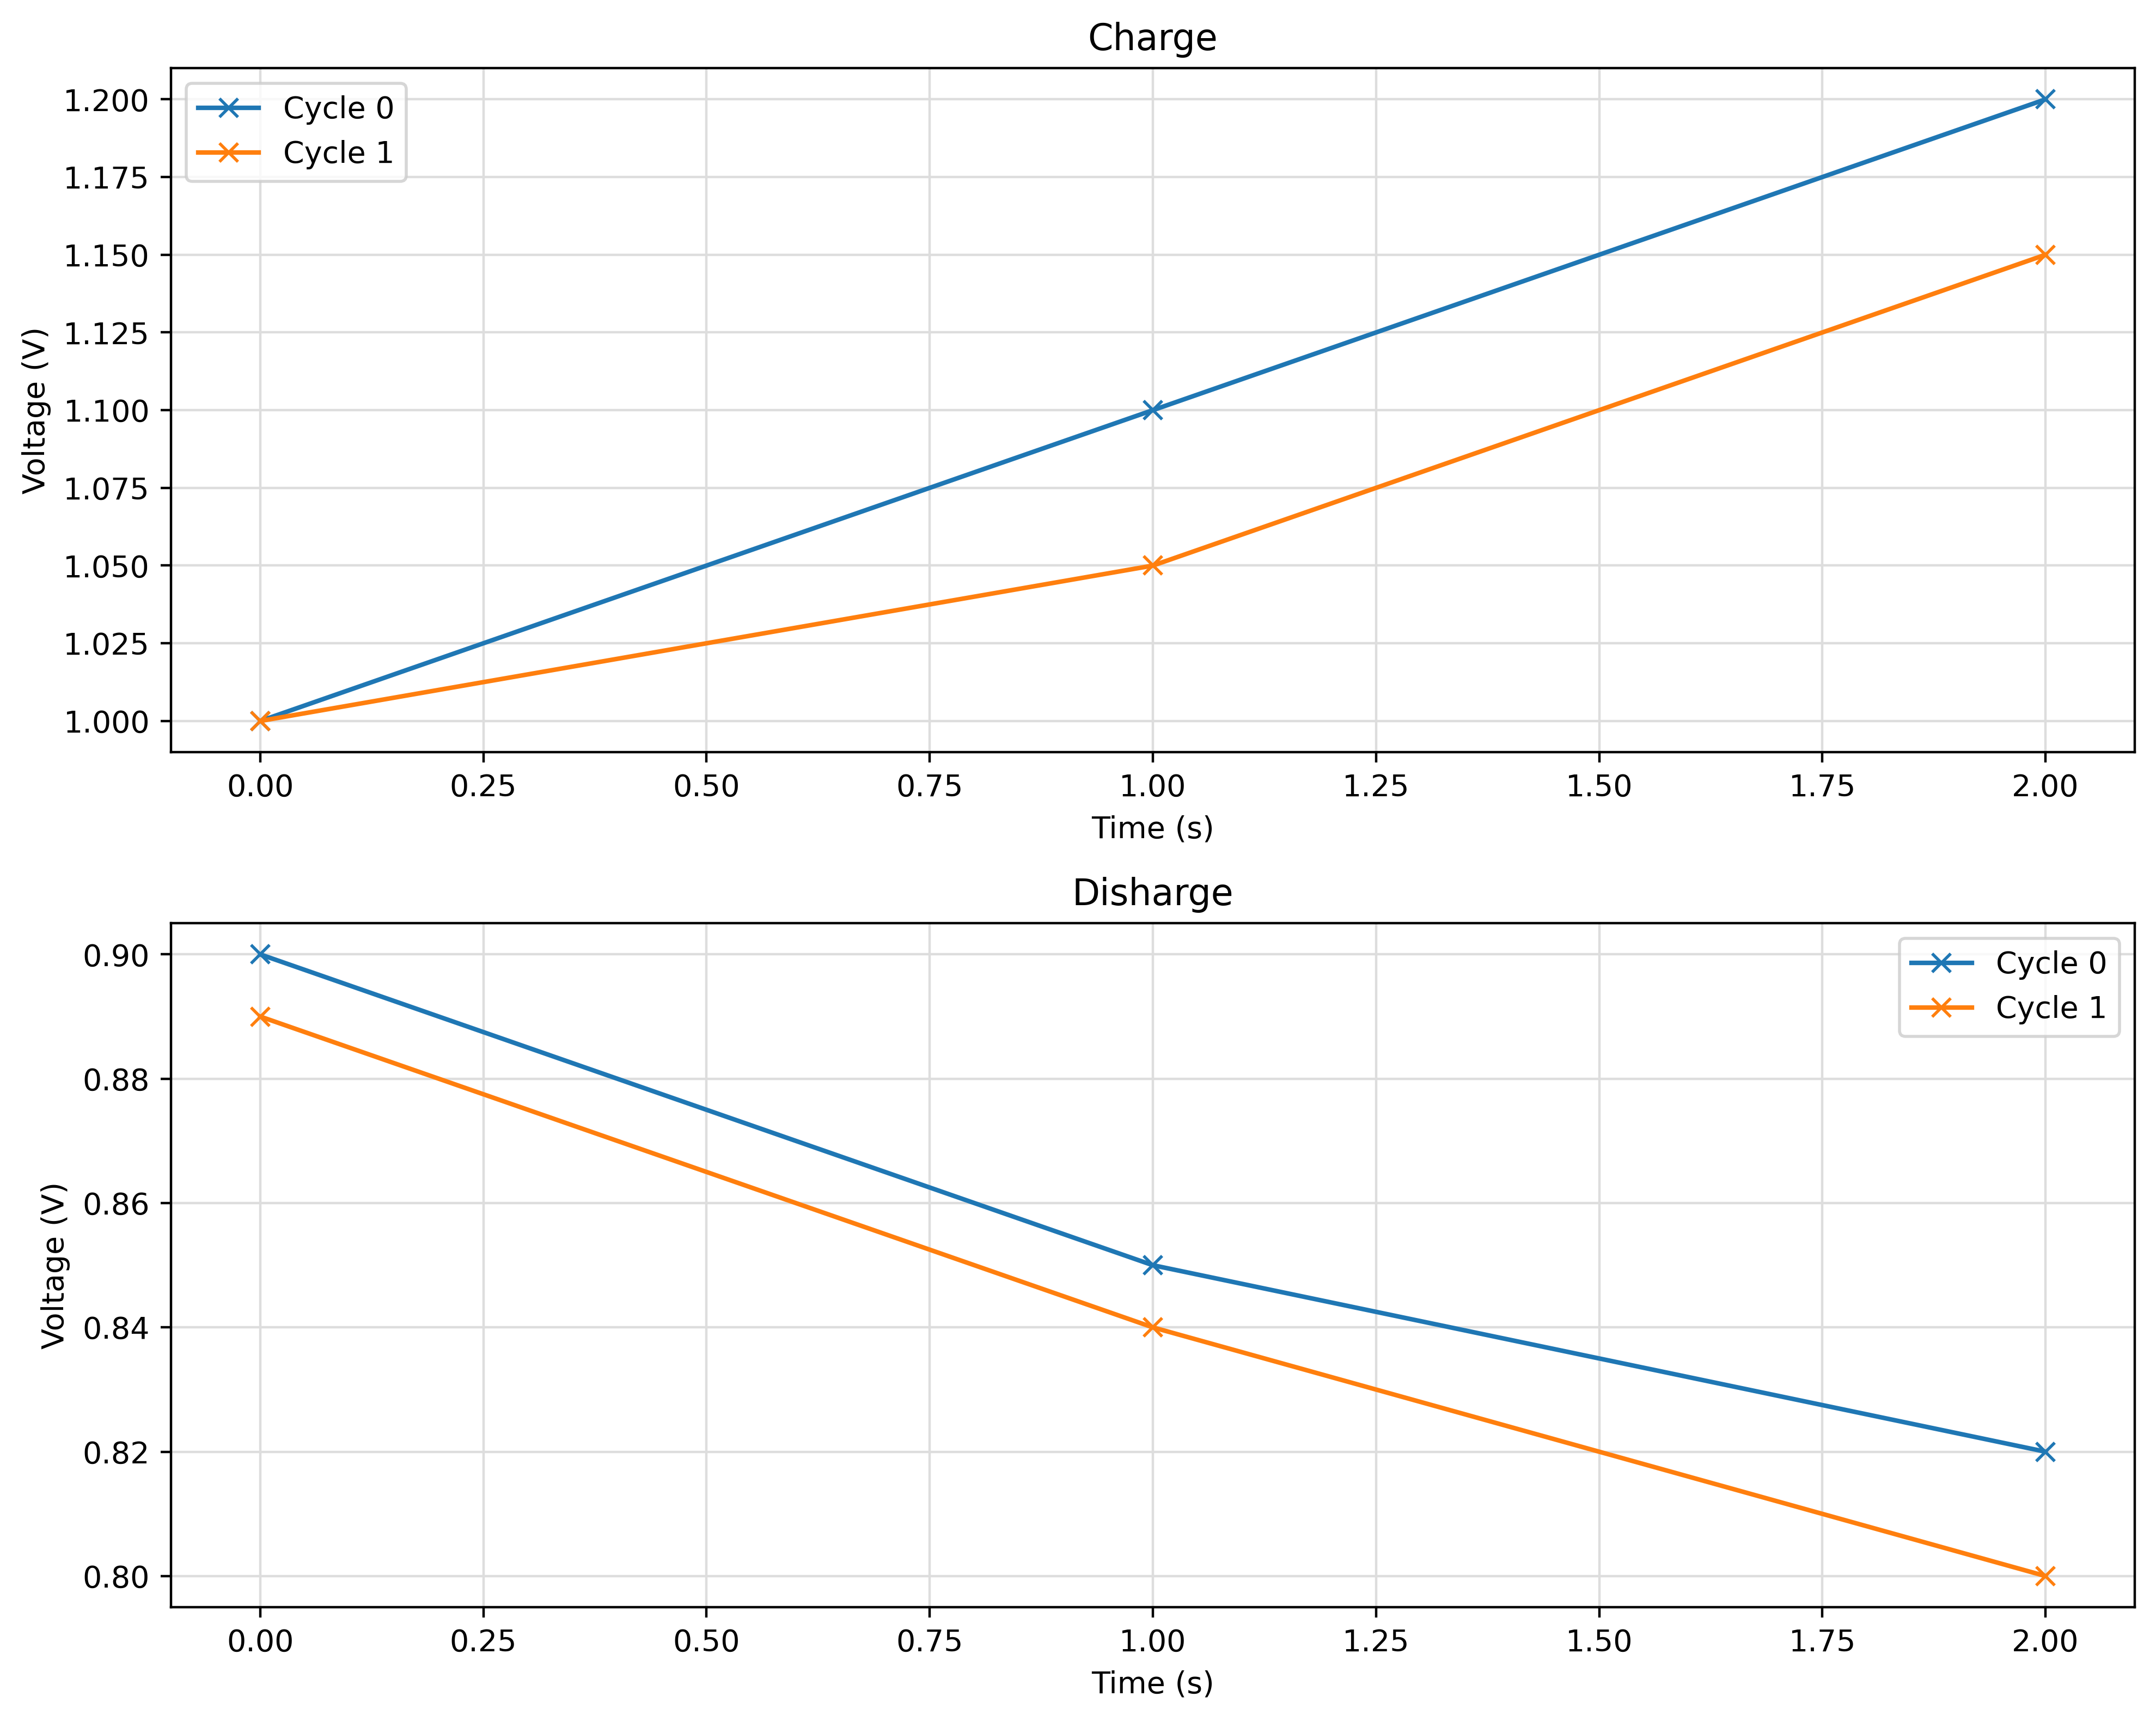

In [31]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8), dpi=400)

for cycle in cellcycling:
    charge = cycle.charge
    ax1.plot(charge.time, charge.voltage, label=f"Cycle {cycle.number}", marker="x")

ax1.set_title("Charge")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Voltage (V)")
ax1.grid(which="major", c="#DDDDDD")
ax1.legend()

for cycle in cellcycling:
    discharge = cycle.discharge
    ax2.plot(discharge.time, discharge.voltage, label=f"Cycle {cycle.number}", marker="x")

ax2.set_title("Disharge")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Voltage (V)")
ax2.grid(which="major", c="#DDDDDD")
ax2.legend()

plt.tight_layout()
plt.show()


## The `Cycle` properties

The `Cycle` object wraps the charge and discharge `HalfCycles` exposing, as a unified time-series, all the experimental data previously discussed for the `HalfCycle` object. As such the following properties are available:

* `time` (`pandas.core.series.Series`) time steps in seconds at which the experimental data have been collected
* `voltage` (`pandas.core.series.Series`) voltage in V recorded at each time step
* `current` (`pandas.core.series.Series`) currents in A recorded at each time step
* `power` (`pandas.core.series.Series`) instantaneous power in W computed at each time step
* `energy` (`pandas.core.series.Series`) instantaneous energy in mWh computed at each time step
* `Q` (`pandas.core.series.Series`) cumulative charge in mAh computed at each time step

The `Cycle` object also exposes new properties to the user such as the `coulomb_efficiency`, the `energy_efficiency` and the `voltage_efficiency` that can be easily obtained according to:

In [32]:
for cycle in cellcycling:
    print(f"Cycle: {cycle.number}")
    print("    - Coulomb efficiency: {:.2f}%".format(cycle.coulomb_efficiency))
    print("    - Energy efficiency: {:.2f}%".format(cycle.energy_efficiency))
    print("    - Voltage efficiency:  {:.2f}%".format(cycle.voltage_efficiency))
    print()

Cycle: 0
    - Coulomb efficiency: 100.00%
    - Energy efficiency: 72.61%
    - Voltage efficiency:  72.61%

Cycle: 1
    - Coulomb efficiency: 100.00%
    - Energy efficiency: 74.55%
    - Voltage efficiency:  74.55%



## The `CellCycling` properties

The `CellCycling` class exposes, as lists, all the properties related to its `Cycles` objects such as:

* `coulomb_efficiencies` (`List[float]`) list of the `coulomb_efficiency` associated to each cycle 
* `energy_efficiencies` (`List[float]`) list of the `energy_efficiency` associated to each cycle
* `voltage_efficiencies` (`List[float]`) list of the `voltage_efficiency` associated to each cycle 

The `CellCycling` class also allows the user to evaluate the capacity retention of the cell in respect to a selected `reference` cycle, to fit it using a linear regression and to compute the `capacity_fade` rate. Given the fitting data, the user can also predict, using the `predict_retention` function, the capacity retention expected at a given cycle number and estimate, by calling the `retention_threshold` function, the cycle number at which the degradation in capacity retention will exceed a given threshold.